<a href="https://colab.research.google.com/github/powderflask/cap-comp215/blob/main/examples/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review - Tuples, Lists, Dictionaries
This is our week 2 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [18]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint

## A simple model
How many students on campus are expected to have Covid?
Data up to Dec. 31 --> question is for Jan. 10

What data do we need?  What data is avaiable?
Data from VC health region - number of active case
Demographic for student - in this demographic
Transmission Rate of current variant (R) - how fast is it doubling?
Total student population size - how many?
Proportion of students who are Cap students

----------------

* N cases in VC H.R. in 21 - 30 age range
* P people in VC HR in 21 - 30 age range
* I = N/P * 100% --> propotion of infections in the age range
* S total students at Cap
* I * S --> number of infections among Cap students
* project that 10 days into future based on R
* R is from historical doubling rate over previous D days


In [39]:
projection = 10             # project 10 days into future
doubling_time = 3           # doubling time for Omicron in days (world wide)
population_size = 1219436   # total pop. in VC HR
prop_in_20_34 = 0.27        # proportion in target demographic
pop_in_20_34 = population_size * prop_in_20_34
number_cases = 4072         # num. active cases in VC HR on Dec. 31 2021
number_cases_in_20_34 = number_cases * prop_in_20_34

cap_students = 11500        # num. students attending Cap

prop_infected = number_cases_in_20_34 / pop_in_20_34
num_infected = prop_infected * cap_students    # num cap students infected Dec. 31
num_infected_projection = num_infected*2**(projection/doubling_time)
num_infected_projection

387.0614475838149

In [20]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=595&after=01-12-2021'

response = requests.request("GET", query, headers={}, data={})
result = json.loads(response.text)
date_strings = [daily['date_report'] for daily in result['cases']]
dates = [datetime.datetime.strptime(date, '%d-%m-%Y').date() for date in date_strings]
cases = [daily['cases'] for daily in result['cases']]


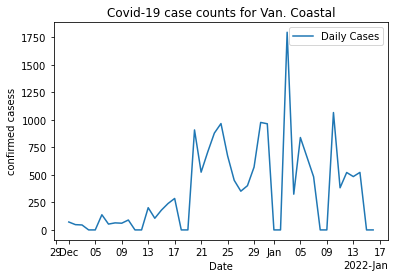

In [21]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, cases, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for Van. Coastal")  # Add a title to the axes.
ax.legend();